# 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 2: Load and Explore Dataset

In [2]:
file_path = '/kaggle/input/cost-of-international-education/International_Education_Costs.csv'
df = pd.read_csv(file_path)
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


# 3: Visualize Data Distributions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

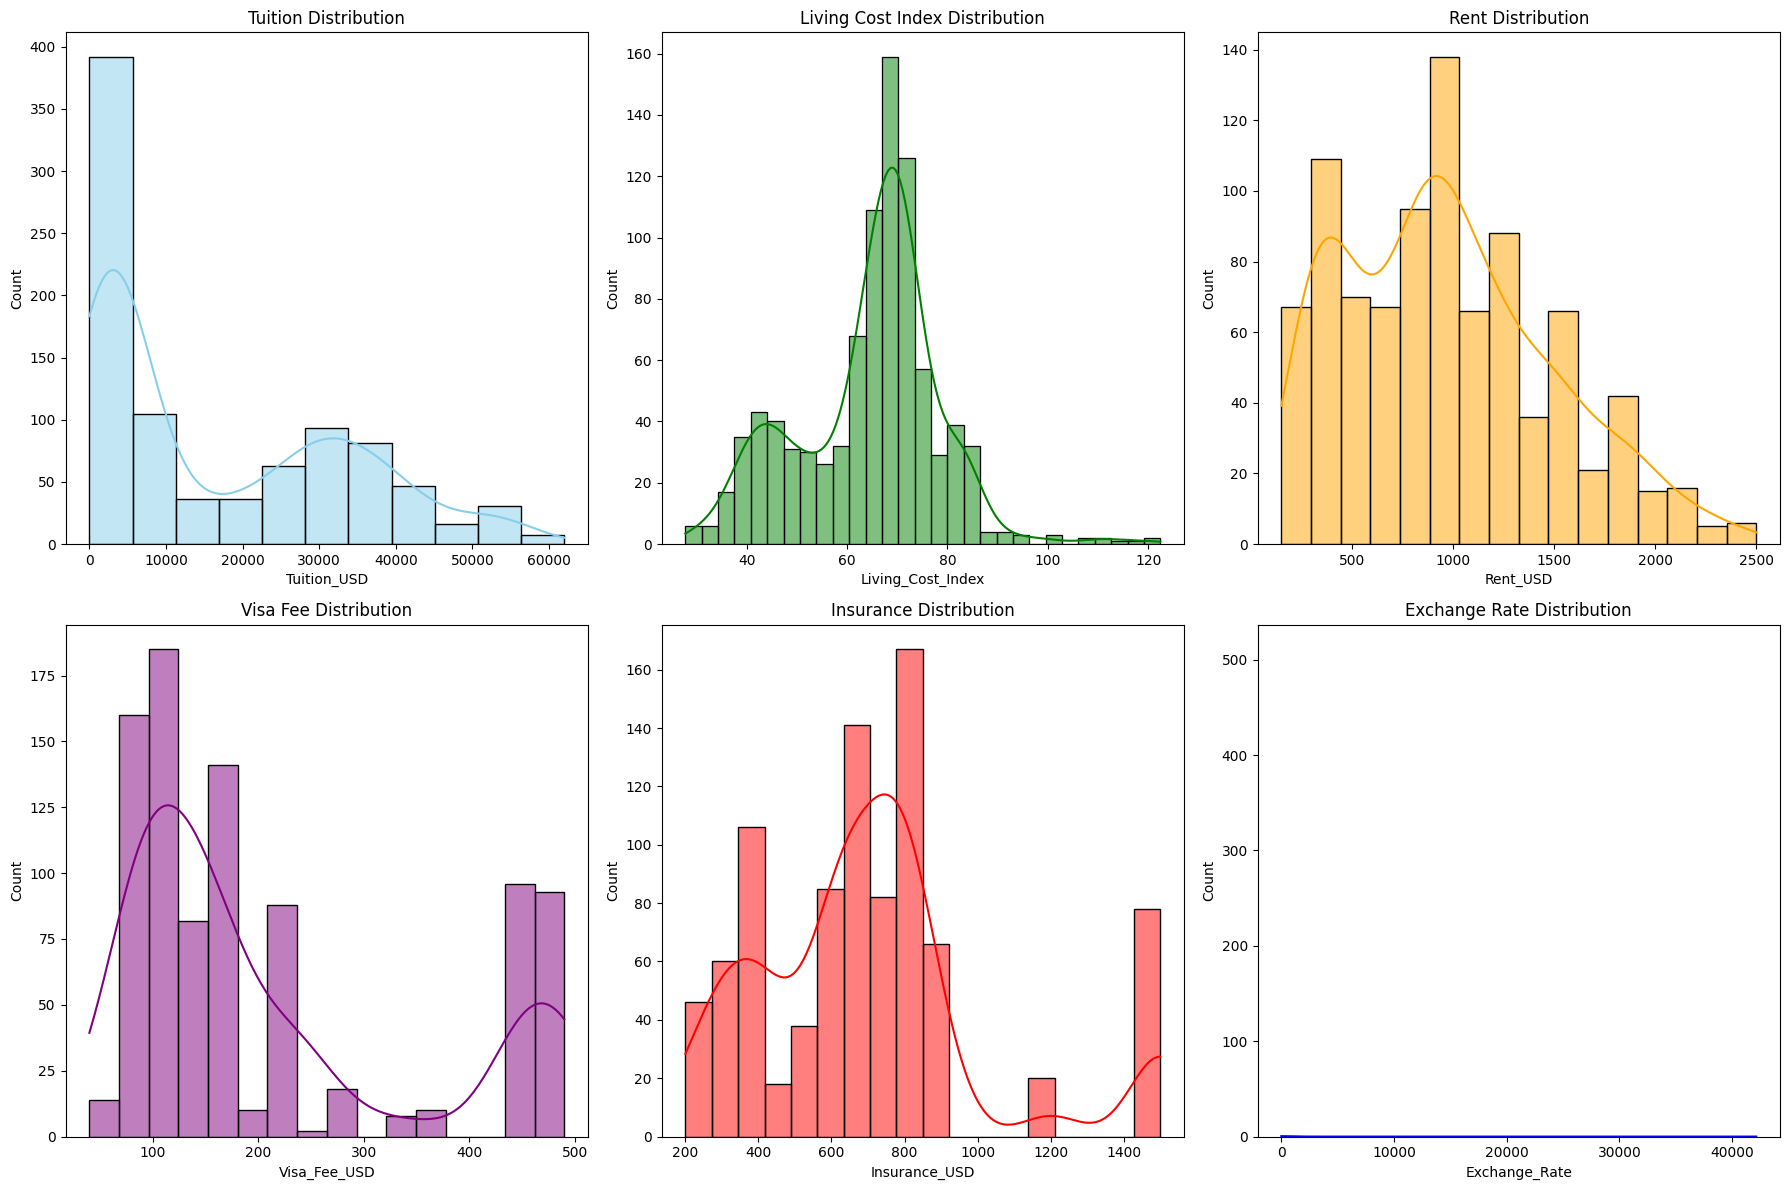

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.histplot(df['Tuition_USD'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Tuition Distribution')

sns.histplot(df['Living_Cost_Index'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Living Cost Index Distribution')

sns.histplot(df['Rent_USD'], kde=True, ax=axes[0, 2], color='orange')
axes[0, 2].set_title('Rent Distribution')

sns.histplot(df['Visa_Fee_USD'], kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Visa Fee Distribution')

sns.histplot(df['Insurance_USD'], kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Insurance Distribution')

sns.histplot(df['Exchange_Rate'], kde=True, ax=axes[1, 2], color='blue')
axes[1, 2].set_title('Exchange Rate Distribution')

plt.tight_layout()
plt.show()


# 4: Correlation Heatmap

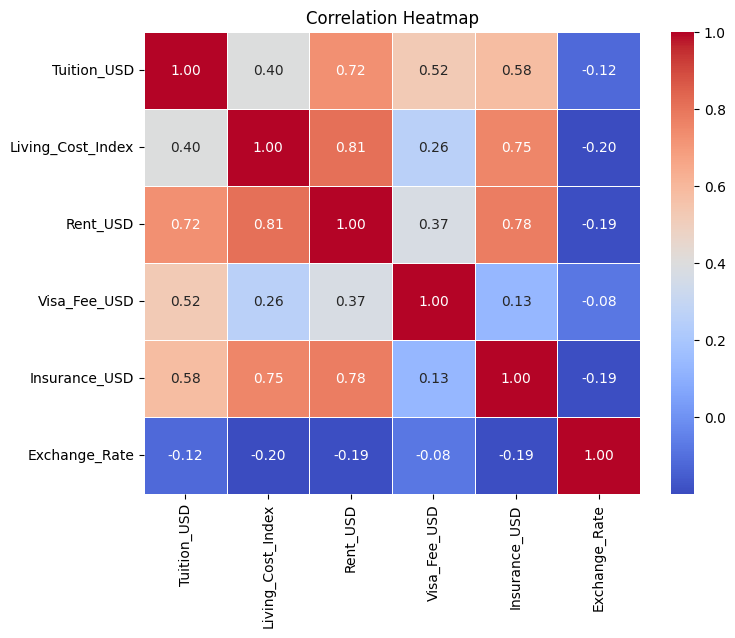

In [4]:
correlation_matrix = df[['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 5: 3D Scatter Plot

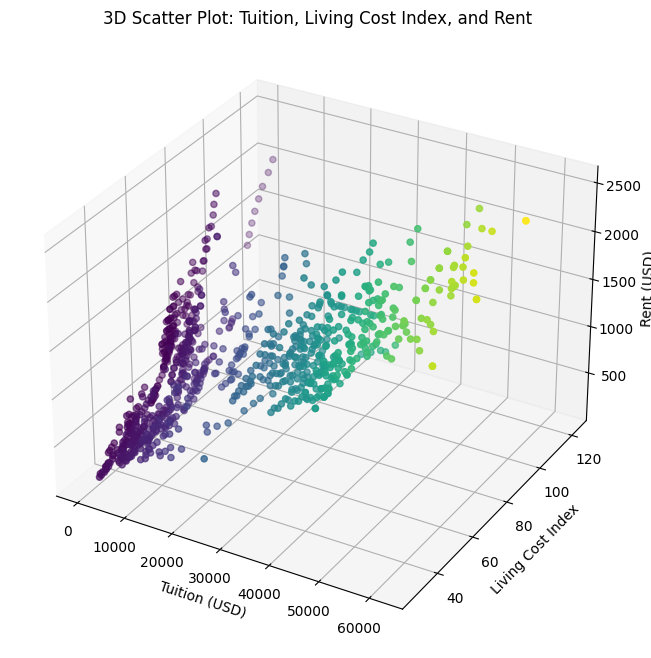

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Tuition_USD'], df['Living_Cost_Index'], df['Rent_USD'], c=df['Tuition_USD'], cmap='viridis')

ax.set_xlabel('Tuition (USD)')
ax.set_ylabel('Living Cost Index')
ax.set_zlabel('Rent (USD)')

ax.set_title('3D Scatter Plot: Tuition, Living Cost Index, and Rent')

plt.show()

#  6: Geospatial Map (Average Tuition by Country)

/tmp/ipykernel_13/435373837.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


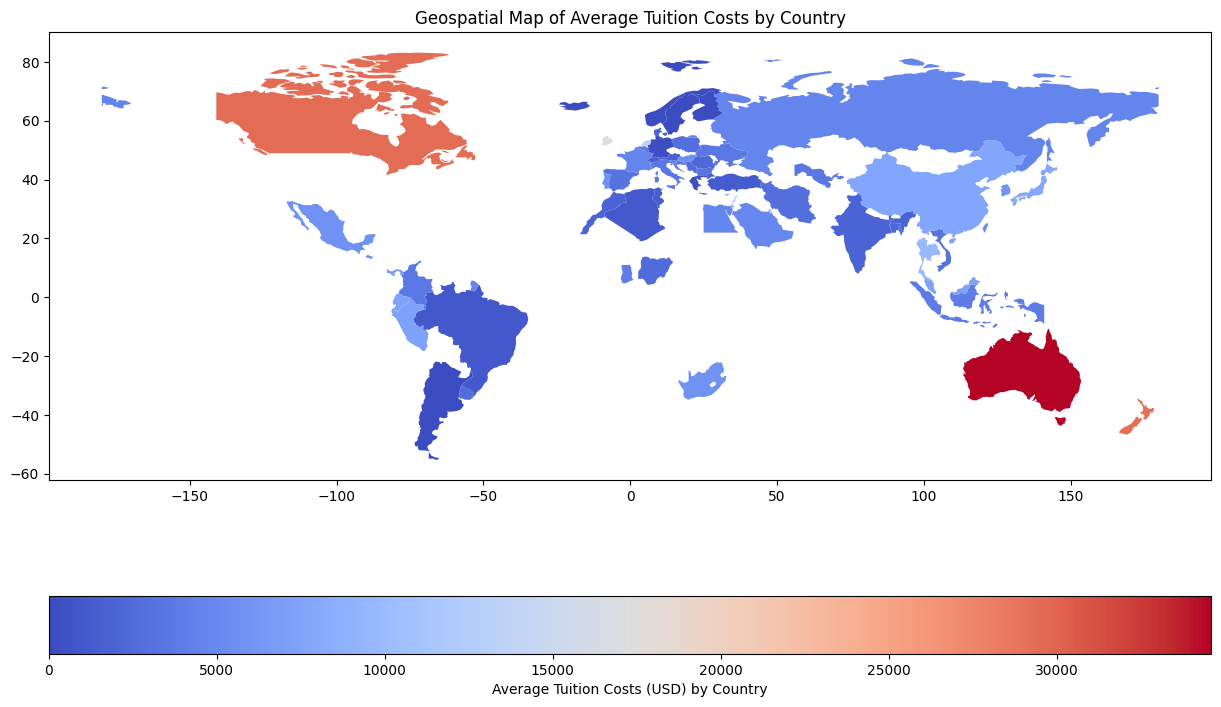

In [6]:
country_avg_tuition = df.groupby('Country')['Tuition_USD'].mean().reset_index()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.rename(columns={"name": "Country"})
merged = world.set_index('Country').join(country_avg_tuition.set_index('Country'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Tuition_USD', ax=ax, legend=True,
            legend_kwds={'label': "Average Tuition Costs (USD) by Country",
                         'orientation': "horizontal"},
            cmap='coolwarm')

ax.set_title('Geospatial Map of Average Tuition Costs by Country')
plt.show()


# 7: Top 20 Countries with Highest Average Tuition

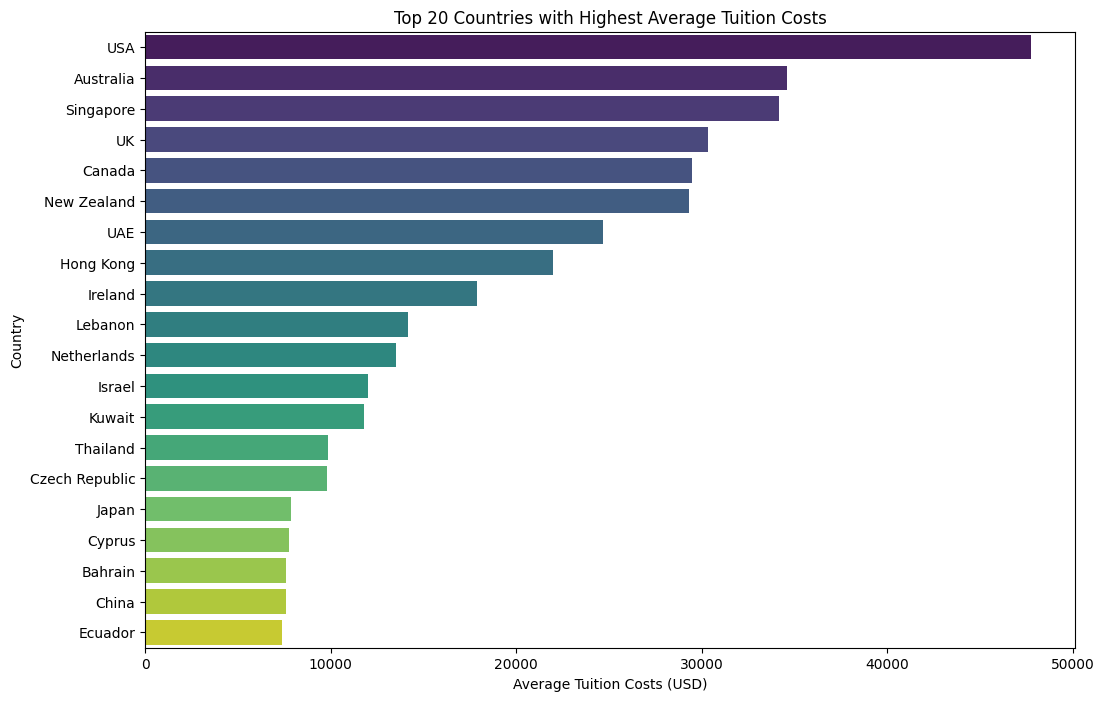

In [7]:
top_20_countries = country_avg_tuition.sort_values(by='Tuition_USD', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Tuition_USD', y='Country', data=top_20_countries, palette='viridis')
plt.title('Top 20 Countries with Highest Average Tuition Costs')
plt.xlabel('Average Tuition Costs (USD)')
plt.ylabel('Country')
plt.show()


# 8: Machine Learning Models (Data Preprocessing)

In [8]:
df_cleaned = df.dropna(subset=['Tuition_USD'])

X = df_cleaned[['Duration_Years', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']]
y = df_cleaned['Tuition_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 9: Linear Regression Model

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

print("Linear Regression Results:\nR-squared:", lr_r2, "\nMAE:", lr_mae)


Linear Regression Results:
R-squared: 0.6556641672835835 
MAE: 6704.742121749296


# 10: Random Forest Regressor Model

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

print("Random Forest Regressor Results:\nR-squared:", rf_r2, "\nMAE:", rf_mae)


Random Forest Regressor Results:
R-squared: 0.9410052356991739 
MAE: 2176.658673469388


# 11: Support Vector Regressor Model

In [11]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)

svr_r2 = r2_score(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)

print("Support Vector Regressor Results:\nR-squared:", svr_r2, "\nMAE:", svr_mae)


Support Vector Regressor Results:
R-squared: -0.34249243909504035 
MAE: 14004.149536903096


# 12: Model Comparison

In [12]:
model_results = {
    "Linear Regression": {"R-squared": lr_r2, "MAE": lr_mae},
    "Random Forest Regressor": {"R-squared": rf_r2, "MAE": rf_mae},
    "Support Vector Regressor": {"R-squared": svr_r2, "MAE": svr_mae}
}

print("Model Results:")
for model, metrics in model_results.items():
    print(f"{model}: R-squared = {metrics['R-squared']:.4f}, MAE = {metrics['MAE']:.4f}")


Model Results:
Linear Regression: R-squared = 0.6557, MAE = 6704.7421
Random Forest Regressor: R-squared = 0.9410, MAE = 2176.6587
Support Vector Regressor: R-squared = -0.3425, MAE = 14004.1495
